In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from pmlb import fetch_data, classification_dataset_names
from scipy import stats

import random as rd
import math

import plotly

import warnings
warnings.filterwarnings('ignore')

import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
meta = np.load("meta.npy")
#num_precent,sample_num,feature_num,class_num,bin_multi,imbalance
bin_index = np.array(np.where(meta[:,4]==0)[0],dtype=np.int)
multi_index = np.where(meta[:,4]==1)[0]
bin_meta = meta[bin_index,:]
# multi_meta = meta[multi_index,:]

# small_index = np.array(np.where(meta[:,1]<1000)[0])
# large_index = np.array(np.where(meta[:,1]>5000)[0])
small_index = np.array(np.where(bin_meta[:,1]<1000)[0])
large_index = np.array(np.where(bin_meta[:,1]>5000)[0])




# balance_index = np.array(np.where(meta[:,5]<=0.5)[0])
# inbalance_index = np.array(np.where(meta[:,5]>0.6)[0])
balance_index = np.array(np.where(bin_meta[:,5]<=0.1)[0])
inbalance_index = np.array(np.where(bin_meta[:,5]>0.1)[0])

In [3]:
[len(bin_index),len(small_index),len(large_index),len(inbalance_index),len(balance_index)]

[91, 63, 9, 25, 66]

In [4]:
pd.DataFrame(meta).describe()

,0,1,2,3,4,5
count,166.000000,1.660000e+02,166.000000,166.000000,166.000000,166.000000
mean,0.480629,1.381870e+04,35.590361,4.156627,0.451807,0.346646
std,0.455907,8.884587e+04,102.084996,3.951162,0.499178,0.868384
min,0.000000,3.200000e+01,2.000000,2.000000,0.000000,0.000000
25%,0.000000,2.740000e+02,8.000000,2.000000,0.000000,0.001463
50%,0.375235,6.900000e+02,13.000000,2.000000,0.000000,0.077653
75%,1.000000,3.180250e+03,29.000000,5.000000,1.000000,0.294897
max,1.500000,1.025009e+06,1000.000000,26.000000,1.000000,8.406173


In [5]:
epc = np.load("lgbpc.npy")

In [6]:
epc.shape


(91, 5)

In [7]:
# param ={'n_estimators':range(10,71,10),
#         'feature_fraction': [0.6,0.7,0.8,0.9,1.0],
#         'bagging_fraction': [0.6,0.7,0.8,0.9,1.0],
#         'min_data_in_leaf':[1,0.005,0.01,0.02,0.05],
#         'max_depth':[depth,int(math.sqrt(depth)),int(math.log2(depth))]}


In [8]:
##On Error
# plt.figure(figsize = (25,5))
# for j in range(0,5):
#     test_err = []
#     for i in range(0,166):
# # remove the small size dataset
#         if  np.all(small_index !=i) :
#             test_err_i = np.array(epc[i,j])[:,4]
#             test_err.append(test_err_i)
#     np_test_err = np.array(test_err)
#     np_test_err.shape
#     plt.subplot(151+j)
#     plt.boxplot(np_test_err)
# plt.show()

In [9]:
# ##On Error 
# plt.figure(figsize = (25,5))
# for j in range(0,5):
#     test_err = []
#     for i in range(0,166):
# #         if i != 121: # remove the small size dataset
#         test_err_i = np.array(epc[i,j])[:,4]
#         test_err.append(test_err_i)
#     np_test_err = np.array(test_err)
#     np_test_err.shape
#     plt.subplot(151+j)
#     plt.boxplot(np_test_err)
# plt.show()
# ##On bias
# plt.figure(figsize = (25,5))
# for j in range(0,5):
#     test_err = []
#     for i in range(0,166):
#         test_err_i = np.array(epc[i,j])[:,1]
#         test_err.append(test_err_i)
#     np_test_err = np.array(test_err)
#     np_test_err.shape
#     plt.subplot(151+j)
#     plt.boxplot(np_test_err)
# plt.show()
# ##On variance
# plt.figure(figsize = (25,5))
# for j in range(0,5):
#     test_err = []
#     for i in range(0,166):
#         test_err_i = np.array(epc[i,j])[:,0]
#         test_err.append(test_err_i)
#     np_test_err = np.array(test_err)
#     np_test_err.shape
#     plt.subplot(151+j)
#     plt.boxplot(np_test_err)
# plt.show()

# Binary_index 

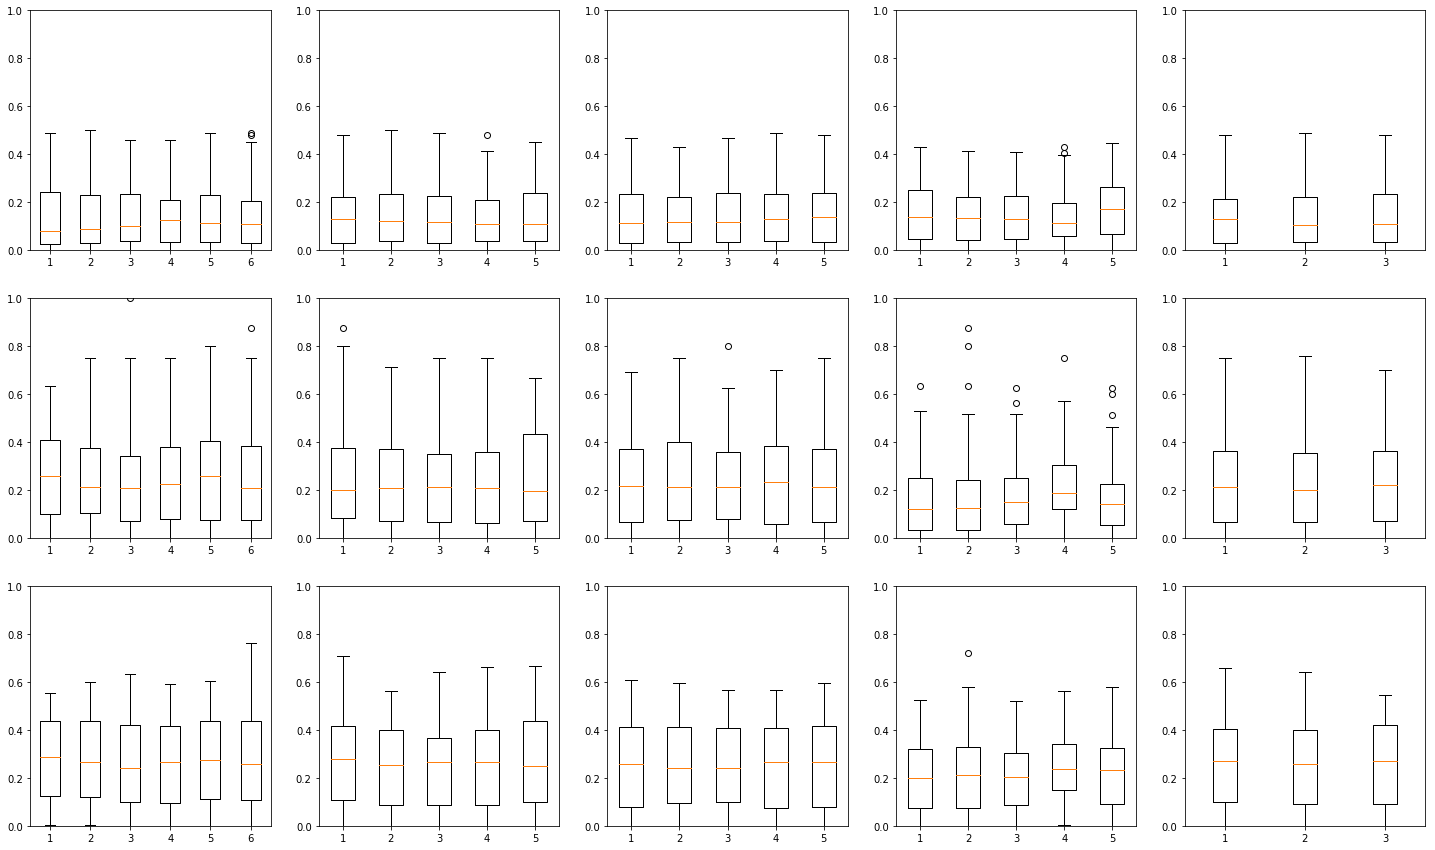

In [10]:

##On bias
plt.figure(figsize = (25,15))
for j in range(0,5):
    test_err = []
    for i in range(0,91):
        test_err_i = np.array(epc[i,j])[:,1]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(3,5,1+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])

##On variance
for j in range(0,5):
    test_err = []
    for i in range(0,91):
        test_err_i = np.array(epc[i,j])[:,0]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(3,5,6+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])

##On Error 


for j in range(0,5):
    test_err = []
    for i in range(0,91):
#         if i != 121: # remove the small size dataset
        test_err_i = np.array(epc[i,j])[:,4]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(3,5,11+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.savefig("pic2.6.1.jpg")
plt.show()

# Multi index

In [11]:
# ##On Error 
# plt.figure(figsize = (25,5))
# for j in range(0,5):
#     test_err = []
#     for i in multi_index:
# #         if i != 121: # remove the small size dataset
#         test_err_i = np.array(epc[i,j])[:,4]
#         test_err.append(test_err_i)
#     np_test_err = np.array(test_err)
#     np_test_err.shape
#     plt.subplot(151+j)
#     plt.boxplot(np_test_err)
# plt.show()

# ##On bias
# plt.figure(figsize = (25,5))
# for j in range(0,5):
#     test_err = []
#     for i in multi_index:
#         test_err_i = np.array(epc[i,j])[:,1]
#         test_err.append(test_err_i)
#     np_test_err = np.array(test_err)
#     np_test_err.shape
#     plt.subplot(151+j)
#     plt.boxplot(np_test_err)
# plt.show()
# ##On variance
# plt.figure(figsize = (25,5))
# for j in range(0,5):
#     test_err = []
#     for i in multi_index:
#         test_err_i = np.array(epc[i,j])[:,0]
#         test_err.append(test_err_i)
#     np_test_err = np.array(test_err)
#     np_test_err.shape
#     plt.subplot(151+j)
#     plt.boxplot(np_test_err)
# plt.show()

# Small index

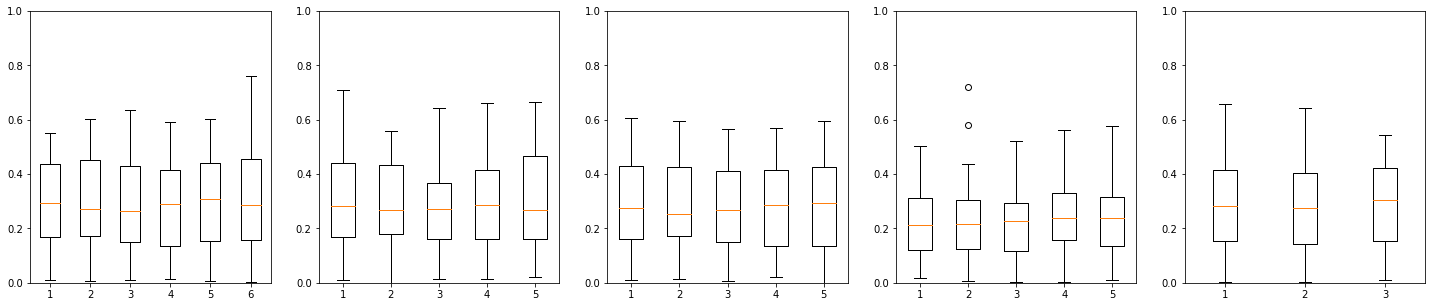

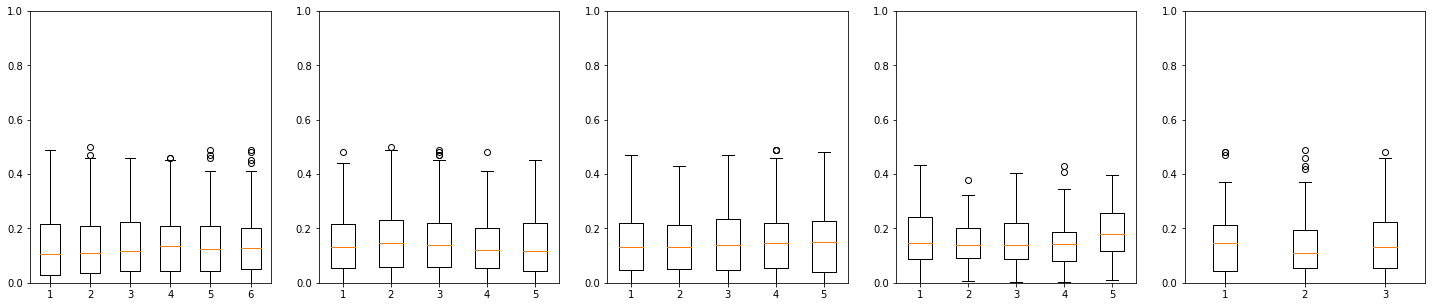

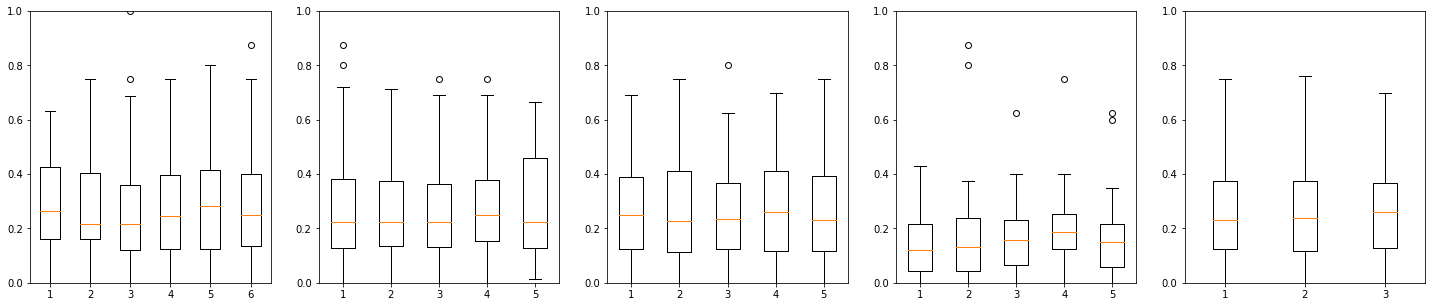

In [12]:
##On Error 
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in small_index:
#         if i != 121: # remove the small size dataset
        test_err_i = np.array(epc[i,j])[:,4]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

##On bias
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in small_index:
        test_err_i = np.array(epc[i,j])[:,1]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()
##On variance
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in small_index:
        test_err_i = np.array(epc[i,j])[:,0]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

# Large index

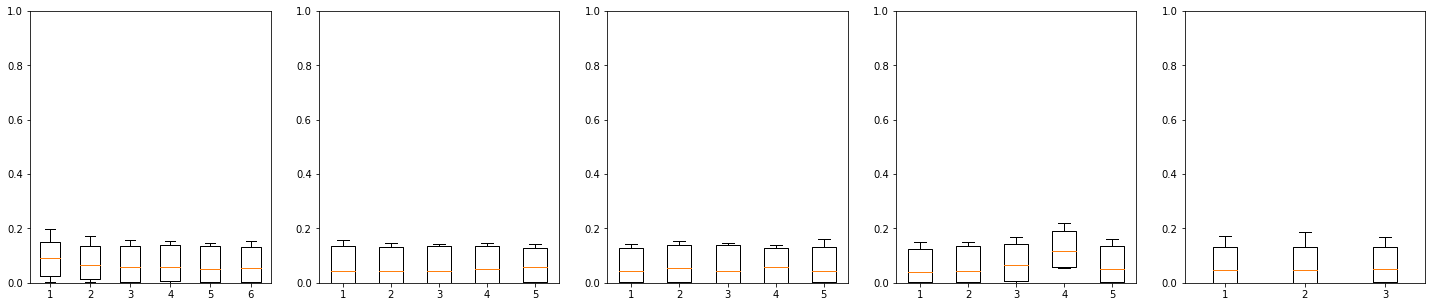

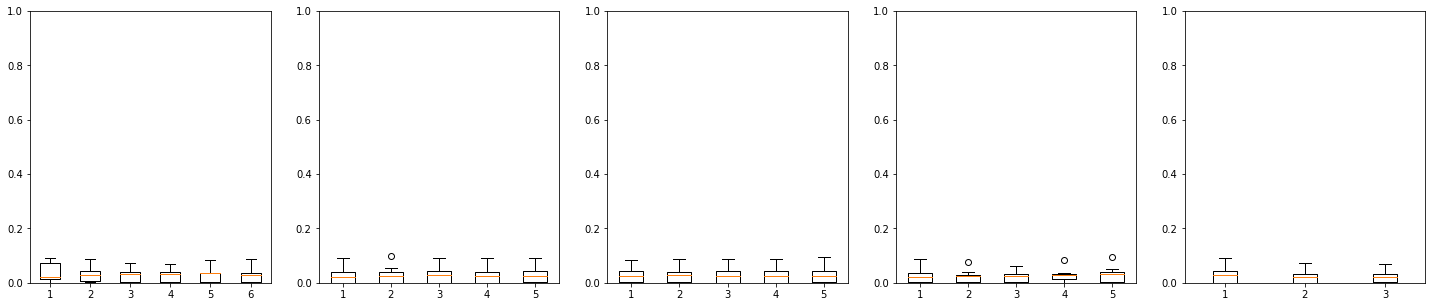

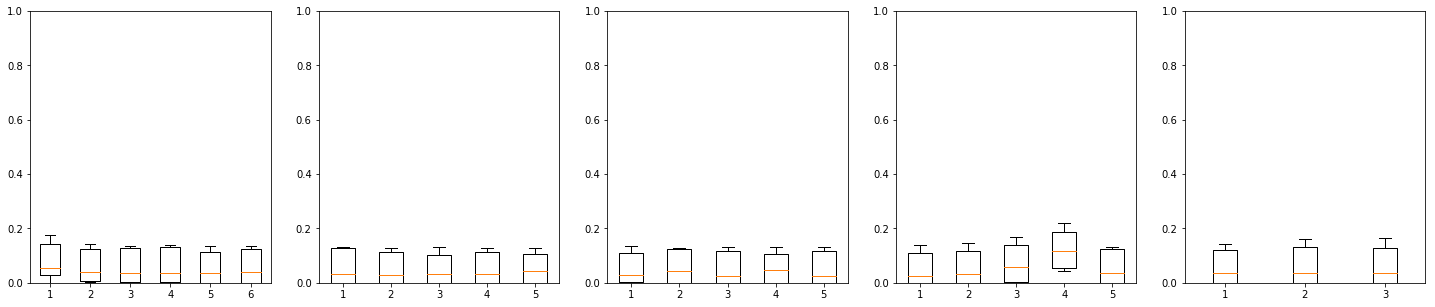

In [13]:
##On Error 
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in large_index:
#         if i != 121: # remove the small size dataset
        test_err_i = np.array(epc[i,j])[:,4]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

##On bias
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in large_index:
        test_err_i = np.array(epc[i,j])[:,1]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()
##On variance
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in large_index:
        test_err_i = np.array(epc[i,j])[:,0]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

# Inbalance Index

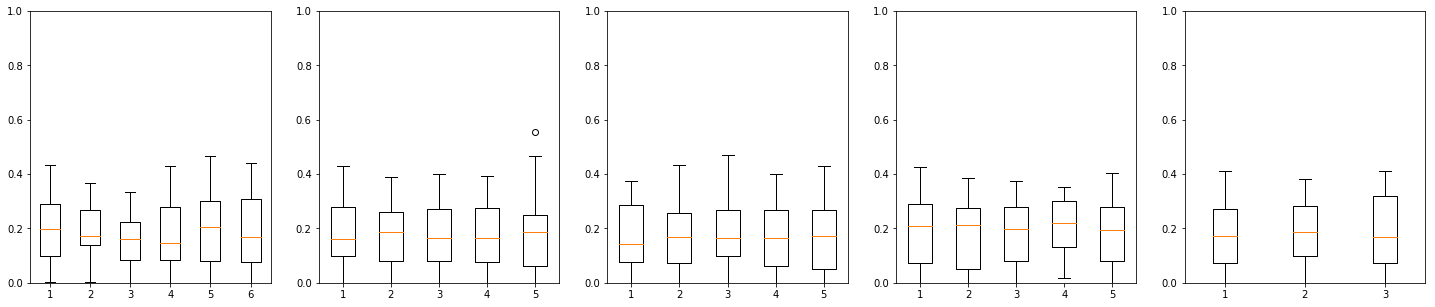

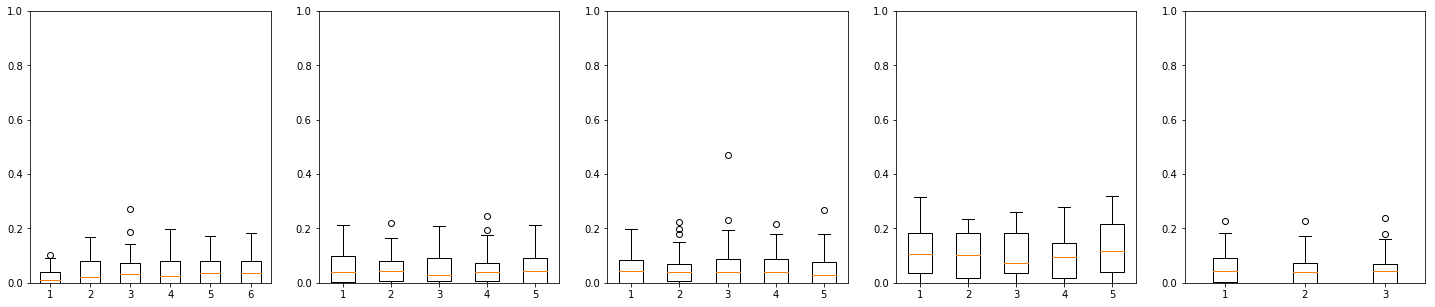

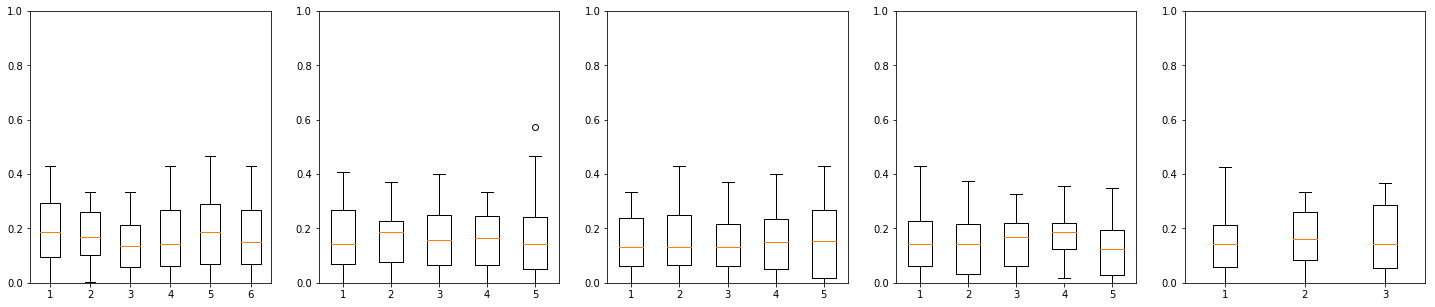

In [14]:
##On Error 
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in inbalance_index:
#         if i != 121: # remove the small size dataset
        test_err_i = np.array(epc[i,j])[:,4]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

##On bias
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in inbalance_index:
        test_err_i = np.array(epc[i,j])[:,1]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()
##On variance
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in inbalance_index:
        test_err_i = np.array(epc[i,j])[:,0]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

# Balance Index

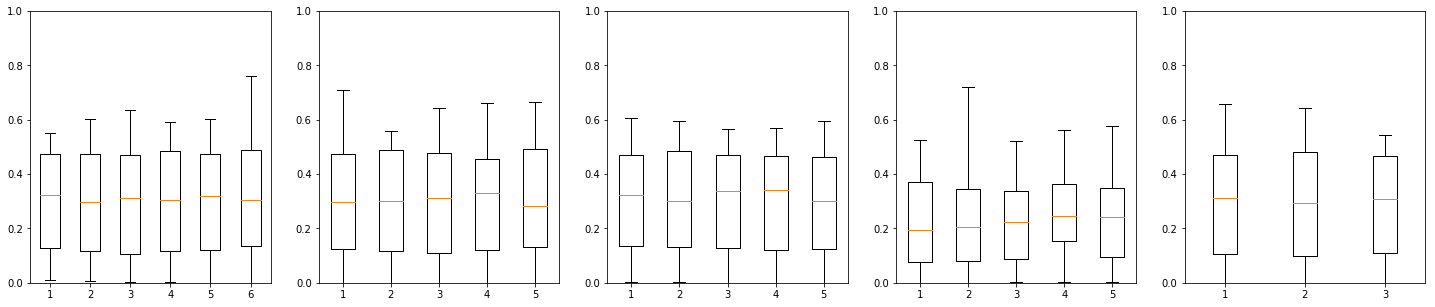

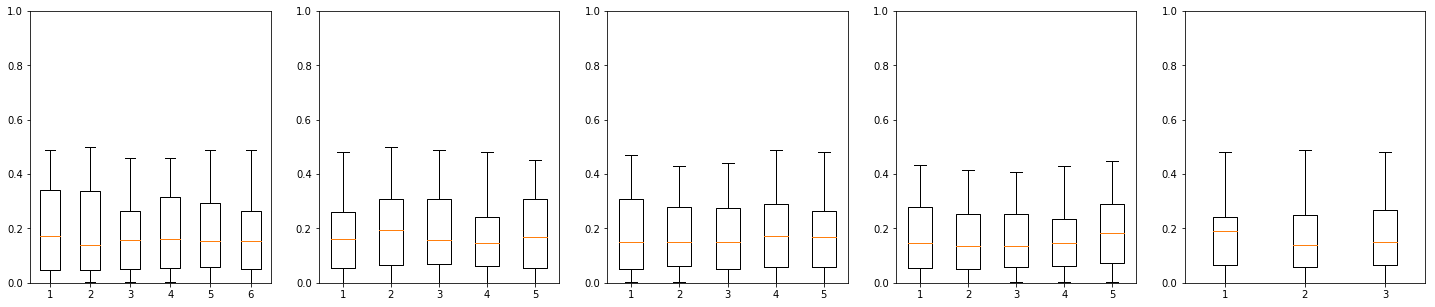

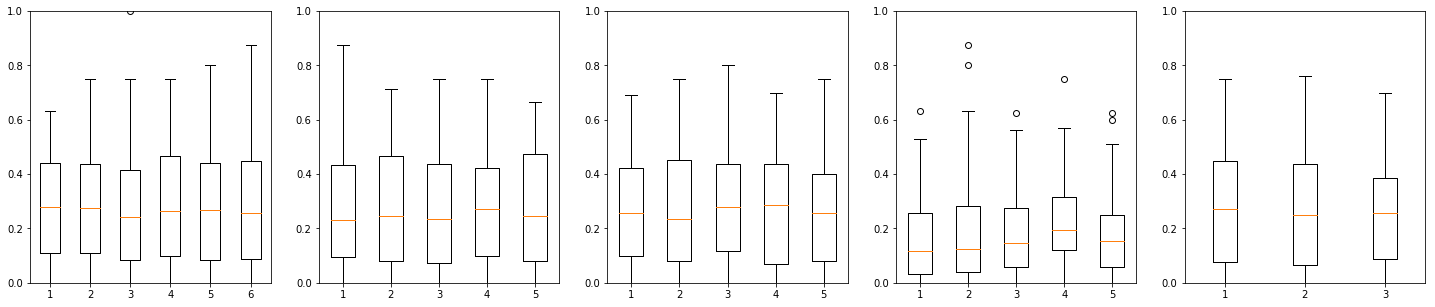

In [15]:
##On Error 
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in balance_index:
#         if i != 121: # remove the small size dataset
        test_err_i = np.array(epc[i,j])[:,4]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

##On bias
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in balance_index:
        test_err_i = np.array(epc[i,j])[:,1]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()
##On variance
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in balance_index:
        test_err_i = np.array(epc[i,j])[:,0]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

# RBD Test treatment

In [16]:
out_est = []
for i in range(0,91):
    x = epc[i,0]
    out_est.append(x)

out_maxf = []
for i in range(0,91):
    x = epc[i,1]
    out_maxf.append(x)
    
out_minss = []
for i in range(0,91):
    x = epc[i,2]
    out_minss.append(x)
    
out_minsl = []
for i in range(0,91):
    x = epc[i,3]
    out_minsl.append(x)
    
out_dep = []
for i in range(0,91):
    x = epc[i,4]
    out_dep.append(x)

np_out_est = np.array(out_est)
np_out_maxf = np.array(out_maxf)
np_out_minss = np.array(out_minss)
np_out_minsl = np.array(out_minsl)
np_out_dep = np.array(out_dep)


np_out_est_bias = np.transpose(np_out_est[:,:,0])
np_out_est_var = np.transpose(np_out_est[:,:,1])
np_out_est_loss = np.transpose(np_out_est[:,:,4])

np_out_maxf_bias = np.transpose(np_out_maxf[:,:,0])
np_out_maxf_var = np.transpose(np_out_maxf[:,:,1])
np_out_maxf_loss = np.transpose(np_out_maxf[:,:,4])

np_out_minss_bias = np.transpose(np_out_minss[:,:,0])
np_out_minss_var = np.transpose(np_out_minss[:,:,1])
np_out_minss_loss = np.transpose(np_out_minss[:,:,4])

np_out_minsl_bias = np.transpose(np_out_minsl[:,:,0])
np_out_minsl_var = np.transpose(np_out_minsl[:,:,1])
np_out_minsl_loss = np.transpose(np_out_minsl[:,:,4])

np_out_dep_bias = np.transpose(np_out_dep[:,:,0])
np_out_dep_var = np.transpose(np_out_dep[:,:,1])
np_out_dep_loss = np.transpose(np_out_dep[:,:,4])

np_out_est_bias.shape

print(stats.f_oneway(*np_out_est_bias))

print(stats.f_oneway(*np_out_est_var))

print(stats.f_oneway(*np_out_est_loss))

print(stats.f_oneway(*np_out_maxf_bias))

print(stats.f_oneway(*np_out_maxf_var))

print(stats.f_oneway(*np_out_maxf_loss))

print(stats.f_oneway(*np_out_minss_bias))

print(stats.f_oneway(*np_out_minss_var))

print(stats.f_oneway(*np_out_minss_loss))

print(stats.f_oneway(*np_out_minsl_bias))

print(stats.f_oneway(*np_out_minsl_var))

print(stats.f_oneway(*np_out_minsl_loss))

print(stats.f_oneway(*np_out_dep_bias))

print(stats.f_oneway(*np_out_dep_var))

print(stats.f_oneway(*np_out_dep_loss))

F_onewayResult(statistic=0.17164327518045638, pvalue=0.9730554852238409)
F_onewayResult(statistic=0.05052926196339651, pvalue=0.9984305107251868)
F_onewayResult(statistic=0.08464923534771525, pvalue=0.9946351406478382)
F_onewayResult(statistic=0.013714841765268925, pvalue=0.9996290333787673)
F_onewayResult(statistic=0.3348908492677961, pvalue=0.8544604270008651)
F_onewayResult(statistic=0.02977190097069842, pvalue=0.9982891124219792)
F_onewayResult(statistic=0.06361700225447255, pvalue=0.9925330283853517)
F_onewayResult(statistic=0.0991224306229258, pvalue=0.9827059280268631)
F_onewayResult(statistic=0.02047874893404107, pvalue=0.9991803651987574)
F_onewayResult(statistic=2.5680003411125405, pvalue=0.037517699049651604)
F_onewayResult(statistic=1.4586010641332474, pvalue=0.21381316057963806)
F_onewayResult(statistic=0.82367854271876, pvalue=0.5105192056912571)
F_onewayResult(statistic=0.05542229878138708, pvalue=0.9460962929883477)
F_onewayResult(statistic=0.1290096031973488, pvalue=0.

In [17]:
row = np.tile(range(0,91),6)
col = np.repeat(range(0,6),91)
pd_out_est_bias = pd.DataFrame(np.transpose([np.concatenate(np_out_est_bias),row,col]),columns=["value","row","col"])
pd_out_est_var = pd.DataFrame(np.transpose([np.concatenate(np_out_est_var),row,col]),columns=["value","row","col"])
pd_out_est_loss = pd.DataFrame(np.transpose([np.concatenate(np_out_est_loss),row,col]),columns=["value","row","col"])

row = np.tile(range(0,91),5)
col = np.repeat(range(0,5),91)
pd_out_maxf_bias = pd.DataFrame(np.transpose([np.concatenate(np_out_maxf_bias),row,col]),columns=["value","row","col"])
pd_out_maxf_var = pd.DataFrame(np.transpose([np.concatenate(np_out_maxf_var),row,col]),columns=["value","row","col"])
pd_out_maxf_loss = pd.DataFrame(np.transpose([np.concatenate(np_out_maxf_loss),row,col]),columns=["value","row","col"])

row = np.tile(range(0,91),5)
col = np.repeat(range(0,5),91)
pd_out_minss_bias = pd.DataFrame(np.transpose([np.concatenate(np_out_minss_bias),row,col]),columns=["value","row","col"])
pd_out_minss_var = pd.DataFrame(np.transpose([np.concatenate(np_out_minss_var),row,col]),columns=["value","row","col"])
pd_out_minss_loss = pd.DataFrame(np.transpose([np.concatenate(np_out_minss_loss),row,col]),columns=["value","row","col"])

row = np.tile(range(0,91),5)
col = np.repeat(range(0,5),91)
pd_out_minsl_bias = pd.DataFrame(np.transpose([np.concatenate(np_out_minsl_bias),row,col]),columns=["value","row","col"])
pd_out_minsl_var = pd.DataFrame(np.transpose([np.concatenate(np_out_minsl_var),row,col]),columns=["value","row","col"])
pd_out_minsl_loss = pd.DataFrame(np.transpose([np.concatenate(np_out_minsl_loss),row,col]),columns=["value","row","col"])

row = np.tile(range(0,91),3)
col = np.repeat(range(0,3),91)
pd_out_dep_bias = pd.DataFrame(np.transpose([np.concatenate(np_out_dep_bias),row,col]),columns=["value","row","col"])
pd_out_dep_var = pd.DataFrame(np.transpose([np.concatenate(np_out_dep_var),row,col]),columns=["value","row","col"])
pd_out_dep_loss = pd.DataFrame(np.transpose([np.concatenate(np_out_dep_loss),row,col]),columns=["value","row","col"])



In [18]:
formula = "value ~ C(row) + C(col)"
print("EST")
res = anova_lm(ols(formula,pd_out_est_bias).fit())
print(res)
res = anova_lm(ols(formula,pd_out_est_var).fit())
print(res)
res = anova_lm(ols(formula,pd_out_est_loss).fit())
print(res)
print("\n"+"FF")
res = anova_lm(ols(formula,pd_out_maxf_bias).fit())
print(res)
res = anova_lm(ols(formula,pd_out_maxf_var).fit())
print(res)
res = anova_lm(ols(formula,pd_out_maxf_loss).fit())
print(res)
print("\n"+"BF")
res = anova_lm(ols(formula,pd_out_minss_bias).fit())
print(res)
res = anova_lm(ols(formula,pd_out_minss_var).fit())
print(res)
res = anova_lm(ols(formula,pd_out_minss_loss).fit())
print(res)
print("\n"+"MDL")
res = anova_lm(ols(formula,pd_out_minsl_bias).fit())
print(res)
res = anova_lm(ols(formula,pd_out_minsl_var).fit())
print(res)
res = anova_lm(ols(formula,pd_out_minsl_loss).fit())
print(res)
print("\n"+"DEPTH")
res = anova_lm(ols(formula,pd_out_dep_bias).fit())
print(res)
res = anova_lm(ols(formula,pd_out_dep_var).fit())
print(res)
res = anova_lm(ols(formula,pd_out_dep_loss).fit())
print(res)

EST
             df     sum_sq   mean_sq          F         PR(>F)
C(row)     90.0  17.720468  0.196894  41.935461  8.048834e-171
C(col)      5.0   0.031521  0.006304   1.342693   2.450568e-01
Residual  450.0   2.112826  0.004695        NaN            NaN
             df    sum_sq   mean_sq          F         PR(>F)
C(row)     90.0  9.459102  0.105101  48.735865  9.306091e-184
C(col)      5.0  0.004880  0.000976   0.452539   8.114613e-01
Residual  450.0  0.970446  0.002157        NaN            NaN
             df     sum_sq   mean_sq           F         PR(>F)
C(row)     90.0  15.932173  0.177024  104.885875  1.091399e-252
C(col)      5.0   0.013083  0.002617    1.550293   1.728983e-01
Residual  450.0   0.759500  0.001688         NaN            NaN

FF
             df     sum_sq   mean_sq          F         PR(>F)
C(row)     90.0  15.370296  0.170781  38.076713  1.465795e-139
C(col)      4.0   0.002071  0.000518   0.115415   9.770342e-01
Residual  360.0   1.614666  0.004485        NaN

In [19]:
# param ={'n_estimators':range(10,71,10),
#         'feature_fraction': [0.6,0.7,0.8,0.9,1.0],
#         'bagging_fraction': [0.6,0.7,0.8,0.9,1.0],
#         'min_data_in_leaf':[1,0.005,0.01,0.02,0.05],
#         'max_depth':[depth,int(math.sqrt(depth)),int(math.log2(depth))]}
